### **学习目标**
1. 学会使用数据集
2. 学会使用数据集加载器

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

引入 train_set 数据集和 DataLoader() 数据加载器

In [25]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST'                  # 数据集存放路径 
    ,train=True                                 # 是否为训练集
    ,download=True                              # 如果没有在数据集存放路径出现就进行下载
    ,transform=transforms.Compose([             # Compose 组成，在()里面传递一个转换的组合
        transforms.ToTensor()                   # 将图像转换为张量，用内置的ToTensor()进行转换
    ])
)
# 第一次需要进行下载操作

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size = 10                  # 一次我们可以查看到 10 张的信息，默认的情况下是 1 张
)
# 一般情况下，utils 是指工具包，用于存放一些常用的工具函数或类，方便在项目中进行调用
# utils 是 utilities 的缩写 翻译 实用工具

了解我们的数据

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)
# 设置pytorch打印选项，使输出的行宽为120

In [4]:
len(train_set)
# 有多少张图片在我们的训练集中

60000

In [5]:
train_set.train_labels, train_set.targets 
# train_set.targets是最新的用法
# 给出每个图片的标签，即每个标签的类别

c:\Users\WHY\miniconda3\envs\d2l\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


(tensor([9, 0, 0,  ..., 3, 0, 5]), tensor([9, 0, 0,  ..., 3, 0, 5]))

In [6]:
train_set.targets.bincount()
# 统计训练集中每个类别的样本数量

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [7]:
sample = next(iter(train_set))
# 获取一个训练集中的样本

In [8]:
len(sample), type(sample)
# 这里长度为 2 的原因：1，样本张量 2，样本标签

(2, tuple)

In [9]:
image, label = sample
# 等价于
# image, lable = sample[0], sample[1]

In [10]:
print(type(image))
print(type(label))
# 跟视频有差异，label是 int 类型了，所以只能查看 image 的形状

<class 'torch.Tensor'>
<class 'int'>


In [11]:
image.shape, label
# 根据 image.shape 为[1, 28, 28]
# 这张图片为 1 通道，灰度图像

(torch.Size([1, 28, 28]), 9)

label: 9


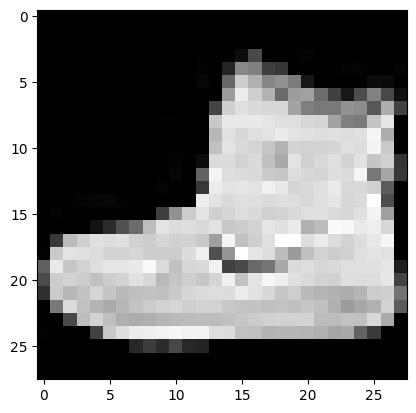

In [12]:
plt.imshow(image.squeeze(), cmap='gray')
# imshow是展示图像的函数，在使用它时，只有 2 维的张量能够被展示 是 image show 的缩写

# .squeeze()方法从张量中删除所有大小为1的维度
# 在这里，它从图像张量中删除了颜色通道数，这个数据集是灰度图像集，(image.shape可以看到torch.Size([1, 28, 28])
# 因此，我们只剩下一个2D张量，可以用于imshow()函数
# 因此，.squeeze()代表的是从张量中删除所有大小为1的维度

# 设置cmap='gray'以显示灰度图像
# camp是colormap的缩写


print('label:', label)

**使用 batch 和 dataloader**

In [13]:
batch = next(iter(train_loader))

In [14]:
len(batch)

2

In [15]:
type(batch)

list

In [16]:
images, labels = batch

In [17]:
images.shape, len(labels)

(torch.Size([10, 1, 28, 28]), 10)

画出批次图像

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


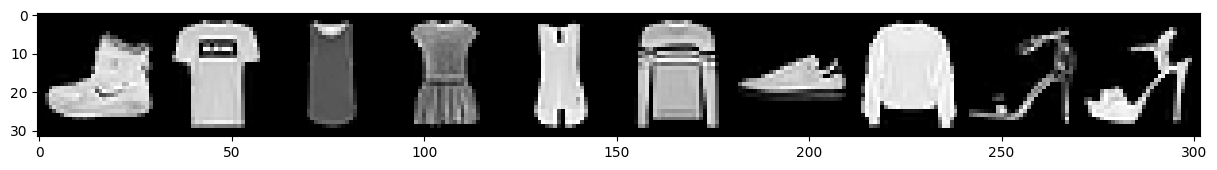

In [18]:
grid = torchvision.utils.make_grid(images, nrow=10)
# grid 翻译 网格，这里使用torchvision.utils.make_grid
# 传入第一批次的图片，nrow 参数是一行展示多少张图像

plt.figure(figsize=(15, 15))
# figure 翻译 画布，创建一个新的画布
# figsize=()是画布的尺寸

plt.imshow(np.transpose(grid, (1, 2, 0)), cmap='gray')
# transpose 翻译 转置 即更换 grid 的维度顺序，下面详解

print(labels)

In [19]:
images.shape ,grid.shape
# 这里可能会有疑问，为什么 images 是 1 通道颜色(grayscale)，
# 经过 torchvision.utils.make_grid 后变成了 3 通道颜色(RGB)
# 因为 make_grid 方法会复制 3 次以创建 3 通道颜色(RGB)

# 高度从 28 到 32 了。
# 原因是 make_grid() 将会在上下左右各填充 2 像素
# 如果不想进行填充可以在 make_grid()时，设定参数 padding = 0
# 例:
# grid = torchvision.utils.make_grid(images, nrow=10, padding=0)
# grid.shape


(torch.Size([10, 1, 28, 28]), torch.Size([3, 32, 302]))

In [20]:
grid.shape, np.transpose(grid, (1, 2, 0)).shape
# np.transpose() 用于改变维度的顺序，原顺序为(0, 1, 2)，更改后为(1, 2 ,0)
# 因为传入 imshow 的参数顺序应该为(height, width, channels)
# grid的维度顺序代表的是(channels, height, width)
# 所以需要使用np.transpose(grid, (1, 2, 0))，以传入正确参数，画出正确的图像

(torch.Size([3, 32, 302]), torch.Size([32, 302, 3]))

**通过改变 dataloader 中的 batch_size以看到更多的一批次信息**

In [21]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = 100
)

In [22]:
batch = next(iter(train_loader))

In [23]:
images, labels = batch

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8])


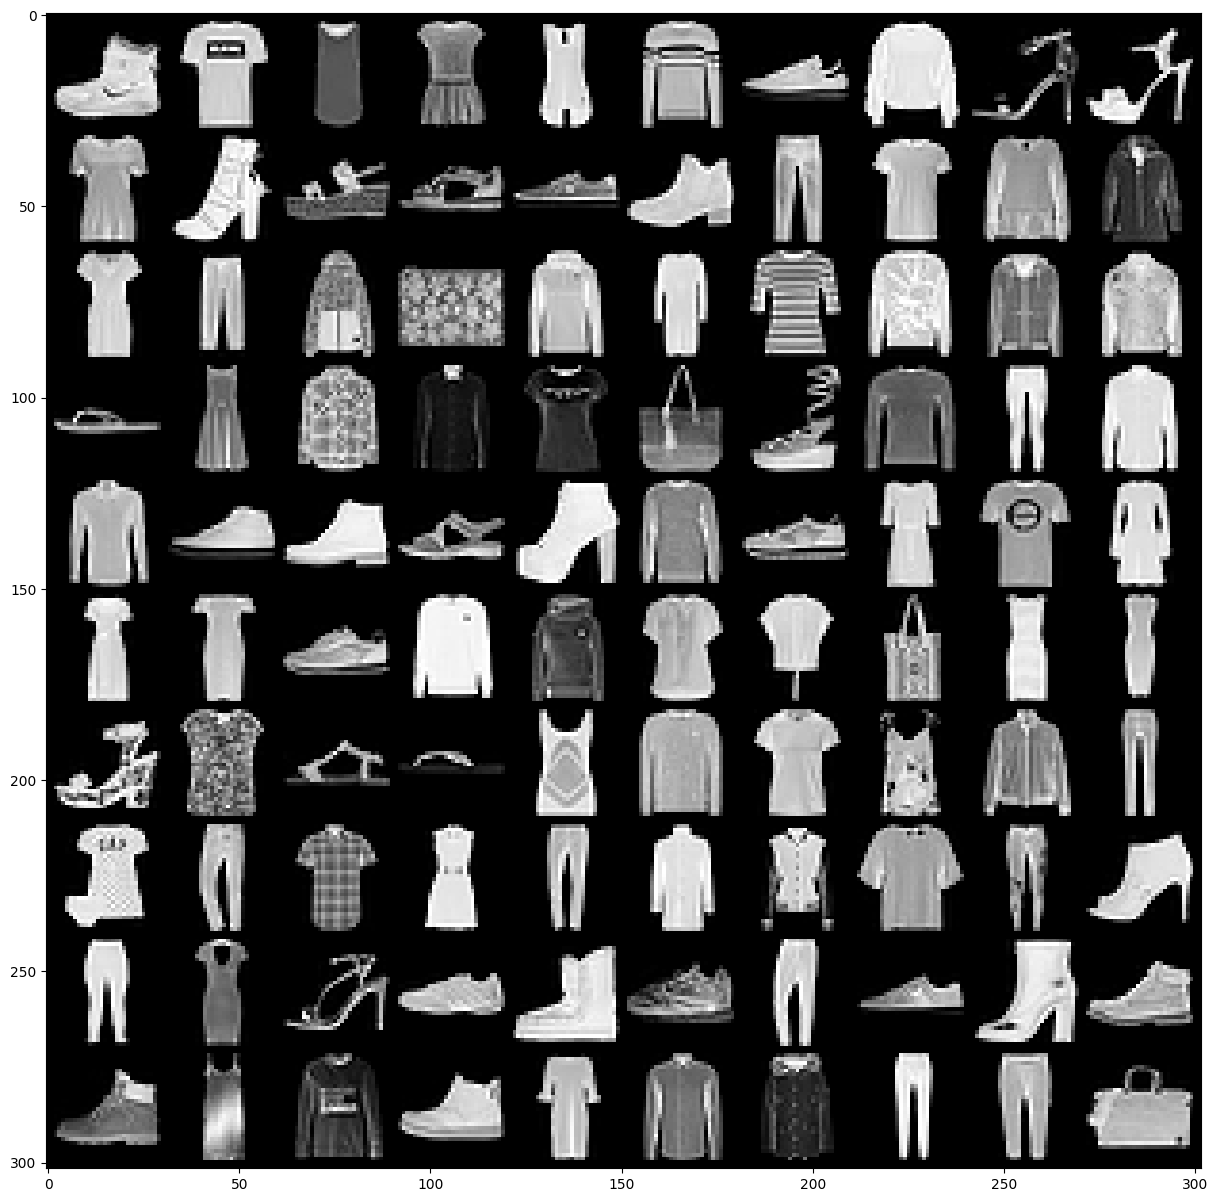

In [24]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 15))

plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels:", labels)